# How to implement features in an ESN
**Objective: study how a combination of tanh, in a neural network, can lead to generate the functions we want.**
## Method
- I began to use 3rd order approximation of tanh to see what coefficient are needed to get features like $x^2, xy, xyz$. 
- In pratctise, using linear regression, I realized that these coeficients were completely irrelevant
- But that we could deduce some tips to choose good combinations of tanh. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- We could say: oh, let's think that tanh is $x-\frac{1}{3}x^2$ and see what we need to get an approximation of our features from a combination of tanh functions

\begin{equation}
\tanh(x + y) = x + y - \frac{1}{3}(x^3 + y^3) - xy^2 - x^2y
\end{equation}

### This is false: 
\subsection{Let's get $x^2$:}
\begin{align}
\tanh(1 + x) &= x + 1 - \frac{1}{3}(x^3 + 1) - x - x^2\\
    &= 1 - \frac{1}{3}(x^3) + \frac{1}{3}- x^2\\
\Rightarrow \tanh(1 + x) + \tanh(1 - x) &= \frac{4}{3} - 2x^2\\
\Rightarrow x^2 &= \frac{2}{3} - \frac{1}{2}(\tanh(1 + x) + \tanh(1 - x))\\
            &= \text{CA}(x)
\end{align}

### This is better: (19/11)
\subsection{Let's get $x^2$:}
\begin{align}
\tanh(1 + x) &= A + Bx + Cx^2
\end{align}
With
\begin{align}
    A &= \tanh(1)\\
    B &= \tanh'(1) = \frac{1}{cosh^2(1)}\\
    C &= \tanh^{(2)}(1) = -2\frac{sinh(1)}{cosh^3(1)}\\
\end{align}
So
\begin{align}
    &tanh(1 + x) + tanh(1 - x) = 2A + 2Cx^2\\
    &\Rightarrow x^2 = \frac{tanh(1 + x) + tanh(1 - x)}{2C} - \frac{A}{C}\\
    &= \text{catan}(x)
\end{align}

\subsection{Let's get $xy$:}
\begin{align}
\text{catan}(x + y) &= x^2 + y^2 + 2xy\\
\Rightarrow \text{catan}(x + y) - \text{catan}(-x - y) &= 4xy\\
\Rightarrow xy &= \frac{1}{4}(\text{catan}(x + y) - \text{catan}(x - y))\\
            &= \frac{1}{8C}(\tanh(1 + x + y) + \tanh(1 - x - y)\\
            &- \tanh(1 + x - y) - \tanh(1 - x + y))\\
            &= \text{prodtan}(x, y)\\
\end{align}

We can see that for both $x^2$ and $xy$ we need a biais of 1, and some linear combinations of $x$ and/or $y$. We do not longer need a biais for $xyz$, because the cube ($^3$) part allow us to retrieve $xyz$. We find for $xyz$ something like this:
\begin{equation}
xyz = \frac{1}{8}(tanh(x + y + z) + tanh(x + y - z) + tanh(x - y + z ) ...)
\end{equation}
However, when plotting results, we can observe that these approximations of tanht are not correct at all, in order to get the features, as show in the middle figure \ref{fig:comptanthird}. But what's interesting in the right figure is that with other coefficients, the approximation is really good. That's why I decided to keep the shape of tanh entries I found with calculus, and adapt coeffeicient with linear regression.

In [2]:
# NN functions
from math import cosh, sinh, tanh

A = tanh(1)
B = 1/cosh(1)**2
C = -2*sinh(1)/(cosh(1)**3)

def get_x_2(x, f, a = -A/C, b = 1/(2*C)):
    return a + b*(f(1 + x) + f(1 - x))

def get_xy(x, y, f, a = 0, b = 1/(4*C)):
    return a + b*(f(1 + x + y) + f(1 - x - y) - f(1 + x - y) - f(1 - x + y))

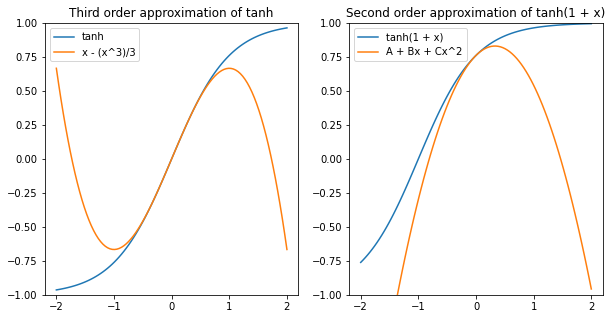

In [3]:
# TANH PLOTTING
plt.figure(figsize=(10,5))
x = np.linspace(-2, 2, 100)

plt.subplot(121)
plt.plot(x, np.tanh(x), label = 'tanh')
plt.plot(x, x - x**3/3, label = 'x - (x^3)/3')
plt.ylim([-1, 1])
plt.title('Third order approximation of tanh')
plt.legend();

plt.subplot(122)
plt.plot(x, np.tanh(1 + x), label = 'tanh(1 + x)')
plt.plot(x, A + B*x + C*x**2, label = 'A + Bx + Cx^2')
plt.ylim([-1, 1])
plt.title('Second order approximation of tanh(1 + x)')
plt.legend();

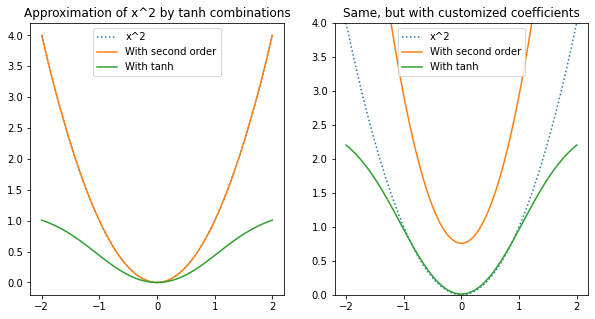

In [4]:
# X^2 PLOTTING
plt.figure(figsize=(10,5))

x = np.linspace(-2, 2, 100)

plt.subplot(121)
plt.plot(x, x**2, linestyle = ':',label = 'x^2')
plt.plot(x, get_x_2(x,  lambda x: A + B*(x-1) + C*(x-1)**2), label = 'With second order')
plt.plot(x, get_x_2(x,  np.tanh), label = 'With tanh')
plt.title('Approximation of x^2 by tanh combinations')
plt.legend();

plt.subplot(122)
plt.plot(x, x**2, linestyle = ':',label = 'x^2')
plt.plot(x, get_x_2(x,  lambda x: A + B*x + C*x**2, a=2.6, b=-1.7), label = 'With second order')
plt.plot(x, get_x_2(x,  np.tanh,  a=2.6, b=-1.7), label = 'With tanh')
plt.title('Same, but with customized coefficients')
plt.ylim([0, 4])
plt.legend();

Note: erreur sur second order approx


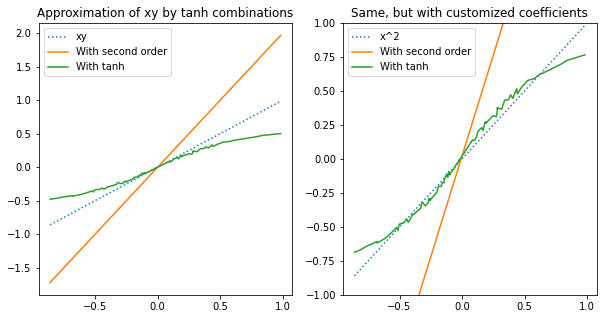

In [5]:
# XY PLOTTING

plt.figure(figsize=(10,5))
x = np.random.uniform(-1, 1, 100)
y = np.random.uniform(-1, 1, 100)

order = np.argsort(x*y)
x = x[order]
y = y[order]
sxy = x*y


plt.subplot(121)
plt.plot(sxy, sxy, linestyle = ':',label = 'xy')
plt.plot(sxy, get_xy(x, y, lambda x: A + B*(x-1) + C*(x-1)**2), label = 'With second order')
plt.plot(sxy, get_xy(x, y,  np.tanh), label = 'With tanh')
plt.title('Approximation of xy by tanh combinations')
plt.legend();

plt.subplot(122)
plt.plot(sxy, x*y, linestyle = ':',label = 'xy')
plt.plot(sxy, get_xy(x, y, lambda x: A + B*x + C*x**2, a=0.022, b=-0.5802), label = 'With second order')
plt.plot(sxy, get_xy(x, y, np.tanh, a=0.022, b=-0.5802), label = 'With tanh')
plt.title('Same, but with customized coefficients')
plt.ylim([-1, 1])
plt.legend();

print('Note: erreur sur second order approx')

# Adapt weights with linear regression

mse =  0.00167
params =  [-1563520.12046 -1563520.26151  2381535.63573]


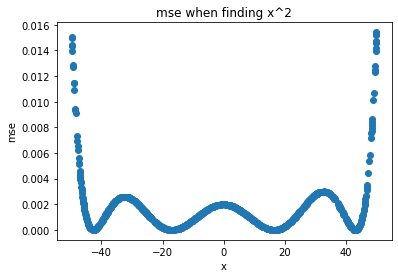

In [6]:
scale = 1/1000
hb = 1/scale
first_layer = scale*np.array([[1, hb], [-1, hb]])

nb_data = 1000
b = 50
x = np.random.uniform(-b, b, nb_data)
biais = np.ones(nb_data)

X = np.vstack((x, biais))

res_layer = np.dot(first_layer, X)
tanh_layer = np.tanh(res_layer)
tanh_and_bias = np.vstack((tanh_layer, biais))
w_out = np.dot(np.linalg.pinv(tanh_and_bias).T, x*x)
# w_out = np.array([-2, -2, 3])
out = np.dot(w_out, tanh_and_bias)

plt.scatter(x,(out - x*x)**2)
plt.title('mse when finding x^2')
plt.xlabel('x')
plt.ylabel('mse')
print('mse = ', round(((out - x*x)**2).mean(), 5))
print('params = ', np.round(w_out, 5))

mse =  0.00223
params =  [-0.55575 -0.55594  0.55621  0.56698 -0.00822]


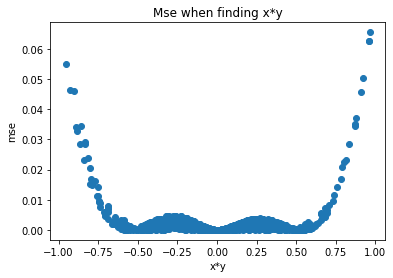

In [7]:
scale = 1
hb = 1/scale
first_layer = scale*np.array([[1, 1, hb], [-1, -1, hb], [1, -1, hb], [-1, 1, hb]])

nb_data = 1000
b = 1
x = np.random.uniform(-b, b, nb_data)
y = np.random.uniform(-b, b, nb_data)
biais = np.ones(nb_data)

X = np.vstack((x, y, biais))

res_layer = np.dot(first_layer, X)
tanh_layer = np.tanh(res_layer)
tanh_and_bias = np.vstack((tanh_layer, biais))
w_out = np.dot(np.linalg.pinv(tanh_and_bias).T, x*y)
out = np.dot(w_out, tanh_and_bias)

plt.scatter(x*y,(out - x*y)**2)
plt.title('Mse when finding x*y')
plt.xlabel('x*y')
plt.ylabel('mse')
print('mse = ', round(((out - x*y)**2).mean(), 5))
print('params = ', np.round(w_out, 5))

mse =  0.0001198318965301833
6.25e+07 [-0.001, -0.001, -0.001, 0]
-6.25e+07 [-0.001, -0.001, 0.001, 0]
-6.25e+07 [-0.001, 0.001, -0.001, 0]
6.25e+07 [-0.001, 0.001, 0.001, 0]
-6.25e+07 [0.001, -0.001, -0.001, 0]
6.25e+07 [0.001, -0.001, 0.001, 0]
6.25e+07 [0.001, 0.001, -0.001, 0]
-6.25e+07 [0.001, 0.001, 0.001, 0]


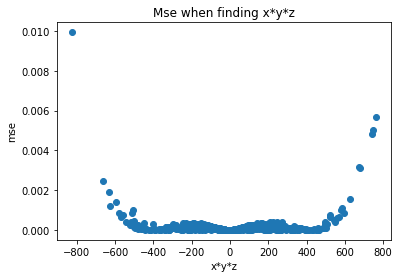

In [8]:
from itertools import product
scale = 1/1000
hb = 0
features = [[x, y, z, hb] for x, y, z in product((-scale, scale), repeat=3)]
first_layer = np.array(features)

nb_data = 1000
b = 10
x = np.random.uniform(-b, b, nb_data)
y = np.random.uniform(-b, b, nb_data)
z = np.random.uniform(-b, b, nb_data)
biais = np.ones(nb_data)

X = np.vstack((x, y, z, biais))

res_layer = np.dot(first_layer, X)
tanh_layer = np.tanh(res_layer)
tanh_and_bias = np.vstack((tanh_layer, biais))
w_out = np.dot(np.linalg.pinv(tanh_and_bias).T, x*y*z)
out = np.dot(w_out, tanh_and_bias)

plt.scatter(x*y*z,(out - x*y*z)**2)
plt.title('Mse when finding x*y*z')
plt.xlabel('x*y*z')
plt.ylabel('mse')
print('mse = ', ((out - x*y*z)**2).mean())
for param, feature in zip(w_out, features):
    print(np.format_float_scientific(param, precision=2), feature)

mse =  0.09393859971743598
Found weights:
     9.21e+06 [-0.01, -0.01, -0.01, -0.01, 1]
     -9.21e+06 [-0.01, -0.01, -0.01, 0.01, 1]
     -9.21e+06 [-0.01, -0.01, 0.01, -0.01, 1]
     9.21e+06 [-0.01, -0.01, 0.01, 0.01, 1]
     -9.21e+06 [-0.01, 0.01, -0.01, -0.01, 1]
     9.21e+06 [-0.01, 0.01, -0.01, 0.01, 1]
     9.21e+06 [-0.01, 0.01, 0.01, -0.01, 1]
     -9.21e+06 [-0.01, 0.01, 0.01, 0.01, 1]
     -9.21e+06 [0.01, -0.01, -0.01, -0.01, 1]
     9.21e+06 [0.01, -0.01, -0.01, 0.01, 1]
     9.21e+06 [0.01, -0.01, 0.01, -0.01, 1]
     -9.21e+06 [0.01, -0.01, 0.01, 0.01, 1]
     9.21e+06 [0.01, 0.01, -0.01, -0.01, 1]
     -9.21e+06 [0.01, 0.01, -0.01, 0.01, 1]
     -9.21e+06 [0.01, 0.01, 0.01, -0.01, 1]
     9.21e+06 [0.01, 0.01, 0.01, 0.01, 1]


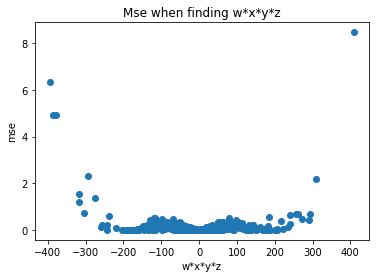

In [9]:
from itertools import product
scale = 1/100
hb = 1
features = [[w, x, y, z, hb] for w, x, y, z in product((-scale, scale), repeat=4)]
first_layer = np.array(features)

nb_data = 1000
b = 5
w = np.random.uniform(-b, b, nb_data)
x = np.random.uniform(-b, b, nb_data)
y = np.random.uniform(-b, b, nb_data)
z = np.random.uniform(-b, b, nb_data)
biais = np.ones(nb_data)

X = np.vstack((w, x, y, z, biais))

res_layer = np.dot(first_layer, X)
tanh_layer = np.tanh(res_layer)
tanh_and_bias = np.vstack((tanh_layer, biais))
w_out = np.dot(np.linalg.pinv(tanh_and_bias).T, w*x*y*z)
out = np.dot(w_out, tanh_and_bias)

plt.scatter(w*x*y*z,(out - w*x*y*z)**2)
plt.title('Mse when finding w*x*y*z')
plt.xlabel('w*x*y*z')
plt.ylabel('mse')
print('mse = ', ((out - w*x*y*z)**2).mean())
print('Found weights:')
for param, feature in zip(w_out, features):
    print('    ', np.format_float_scientific(param, precision=2), feature)

mse =  0.26601
     4.44e-01 [2 0]
     0.e+00 [0 0]


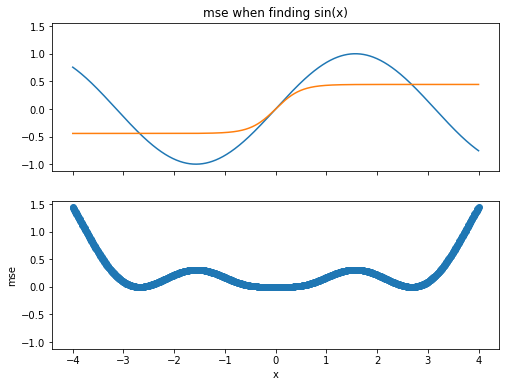

In [10]:
scale = 2
hb = 0
first_layer = scale*np.array([[1, hb], [0, hb]])
features = first_layer
nb_data = 1000
b = 4
v_rand = 0
x = np.linspace(-b, b, nb_data)
biais = np.ones(nb_data)

X = np.vstack((x, biais))

res_layer = np.dot(first_layer, X)
tanh_layer = np.tanh(res_layer)
tanh_and_bias = np.vstack((tanh_layer, biais))
noise= np.random.normal(0, v_rand, size=nb_data)
w_out = np.dot(np.linalg.pinv(tanh_and_bias).T, np.sin(x) + noise)
# w_out = np.array([-2, -2, 3])
out = np.dot(w_out, tanh_and_bias)

fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True, sharey=True)
ax1, ax2 = axes
ax1.set_title('mse when finding sin(x)')
ax1.plot(x, np.sin(x))
ax1.plot(x, out)

ax2.scatter(x,(out - np.sin(x))**2)
ax2.set_xlabel('x')
ax2.set_ylabel('mse')
print('mse = ', round(((out - np.sin(x))**2).mean(), 5))
for param, feature in zip(w_out, features):
    print('    ', np.format_float_scientific(param, precision=2), feature)



mse =  0.00235
     1.42e+02 [0.25 0.  ]
     -7.33e+01 [0.25 0.25]
     7.33e+01 [-0.25  0.25]
     1.38e-12 [0.   0.25]


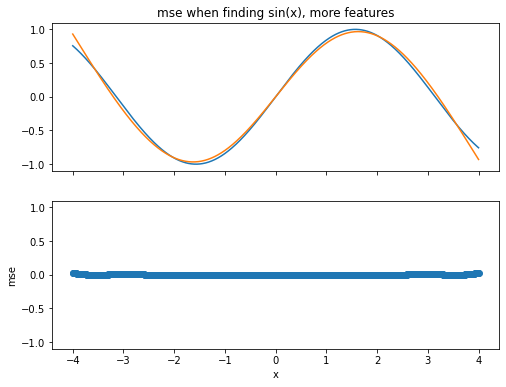

In [11]:
scale = 1/4
hb = 1
first_layer = scale*np.array([[1, 0], [1, hb], [-1, hb], [0, hb]])
features = first_layer

nb_data = 1000
b = 4
v_rand = 0
x = np.linspace(-b, b, nb_data)
biais = np.ones(nb_data)

X = np.vstack((x, biais))

res_layer = np.dot(first_layer, X)
tanh_layer = np.tanh(res_layer)
tanh_and_bias = np.vstack((tanh_layer, biais))
noise= np.random.normal(0, v_rand, size=nb_data)
w_out = np.dot(np.linalg.pinv(tanh_and_bias).T, np.sin(x) + noise)
# w_out = np.array([-2, -2, 3])
out = np.dot(w_out, tanh_and_bias)

fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True, sharey=True)
ax1, ax2 = axes
ax1.plot(x, np.sin(x))
ax1.plot(x, out)

ax2.scatter(x,(out - np.sin(x))**2)
ax1.set_title('mse when finding sin(x), more features')
ax2.set_xlabel('x')
ax2.set_ylabel('mse')
print('mse = ', round(((out - np.sin(x))**2).mean(), 5))
for param, feature in zip(w_out, features):
    print('    ', np.format_float_scientific(param, precision=2), feature)

# Results
- As expected, we can predict if a biais is usefull or not, regarding how the third order behave in an equation
- It's cool to put al linear combinations of entries weighted by $-s$ or $+s$ with $s$ some scale
- It's REALLY better to have very little input weights, and a biais of order $1$ FOR POLYNOMIALS 
- It does not improve anything to put different values of $s$
- Whith little enough values of $s$, it works with a really LARGE amount of values. Actually, it's normal. But doesn't work for sin, normal as well
- On sin, smalling the scale is inefficient, and scale choice is crucial
# Advices
- Every combinations with $+s$ or $-s$ times the variables should be in the network, if we need a function of these variables
- Either:
    - Normalize
    - Choose smaaal scale $s$
- Keep $+s$ or $-s$ as weights inside the network, it's ok and even better thant different values
- A biais is really important for some functions
# To study
- Other functions
- Is it possible to know exactly universality occurs ? And the weight values ?
- What happends (is it more efficient) with several layers ?